In [205]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_datareader as pdr 
import datetime as dt

In [214]:
highport=['ERTH','TAN','XLF','XLK','ICLN','PBD','SUSA','QCLN','VGT','EWC']

In [207]:
lowport=['XPH','XBI','RHS','IYR','VNQ','PPH','IYH','IXJ','PSR','VHT']

In [208]:
pdr.get_data_yahoo('XLF','2010-08-01','2021-07-31')

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-08-02,12.258327,12.071487,12.120227,12.250203,120011913.0,9.890326
2010-08-03,12.217709,12.095857,12.185215,12.112104,81845251.0,9.778829
2010-08-04,12.201462,12.087734,12.160845,12.160845,82030516.0,9.818183
2010-08-05,12.136474,12.038993,12.071487,12.112104,50578959.0,9.778829
2010-08-06,12.055240,11.844029,11.990252,12.006499,101926554.0,9.693568
...,...,...,...,...,...,...
2021-07-26,36.540001,36.169998,36.189999,36.470001,25396000.0,35.998795
2021-07-27,36.619999,36.020000,36.189999,36.459999,38988400.0,35.988918
2021-07-28,36.639999,36.160000,36.590000,36.410000,42908200.0,35.939568


In [267]:
low_portfolio_values=pd.DataFrame()

In [268]:
wt=[0.1]*10

In [269]:
fv=1000000
amt=[i*fv for i in wt]

In [270]:
amt_ref=dict(zip(lowport,amt))

In [271]:
adj_low=pd.DataFrame()
for i in lowport:
    p=pdr.get_data_yahoo(i,'2010-08-01','2021-07-31')
    price=p['Adj Close']
    rets=price.pct_change()
    cumrets=np.cumprod(1+rets)
    cumrets=cumrets*amt_ref[i]
    low_portfolio_values[i]=cumrets
    ret=p.pct_change()
    cumret=np.cumprod(1+ret)
    t=cumret.iloc[-1]['Adj Close']
    pv=pv+t*amt_ref[i]

In [272]:
low_portfolio_values['sum']=low_portfolio_values.sum(axis=1)

In [273]:
low_portfolio_values=low_portfolio_values.dropna()

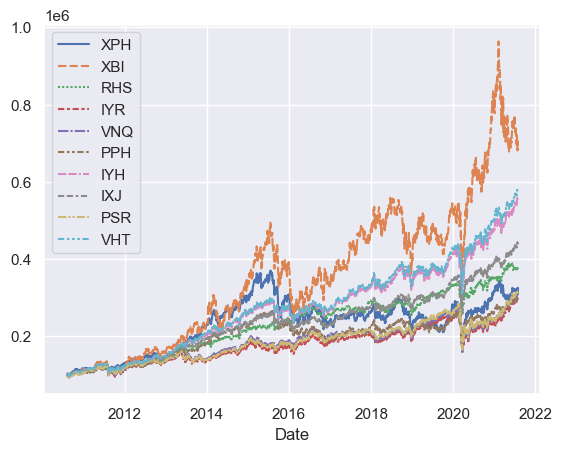

In [274]:
sns.set_theme()
sns.lineplot(data=low_portfolio_values.drop(['sum'],axis=1))
plt.legend()
plt.show()

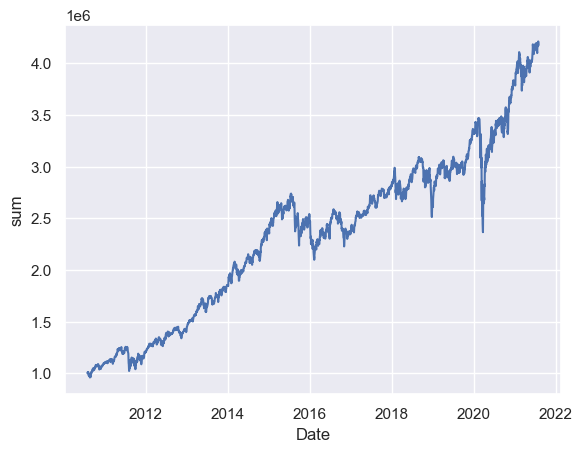

In [275]:
sns.set_theme()
sns.lineplot(data=low_portfolio_values,x='Date',y='sum')
plt.show()

In [276]:
wt=[0.1]*10
fv=1000000
amt=[i*fv for i in wt]

In [277]:
high_portfolio_values=pd.DataFrame()

In [278]:
amt_ref=dict(zip(highport,amt))

In [279]:
for i in highport:
    p=pdr.get_data_yahoo(i,'2010-08-01','2021-07-31')
    price=p['Adj Close']
    rets=price.pct_change()
    cumrets=np.cumprod(1+rets)
    cumrets=cumrets*amt_ref[i]
    high_portfolio_values[i]=cumrets
    ret=p.pct_change()
    cumret=np.cumprod(1+ret)
    t=cumret.iloc[-1]['Adj Close']
    pv=pv+t*amt_ref[i]

In [280]:
high_portfolio_values['sum']=high_portfolio_values.sum(axis=1)

In [281]:
high_portfolio_values=high_portfolio_values.dropna()

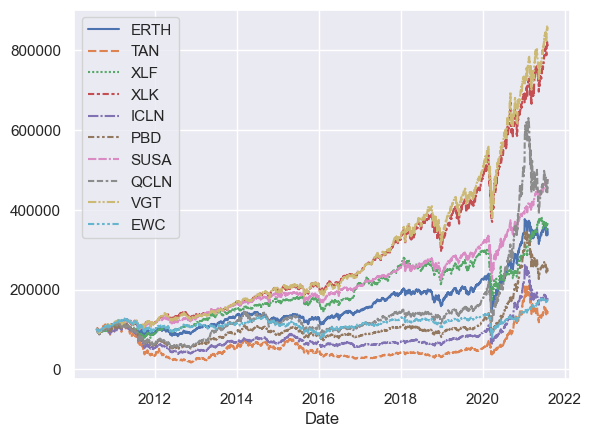

In [282]:
sns.set_theme()
sns.lineplot(data=high_portfolio_values.drop(['sum'],axis=1))
plt.legend()
plt.show()

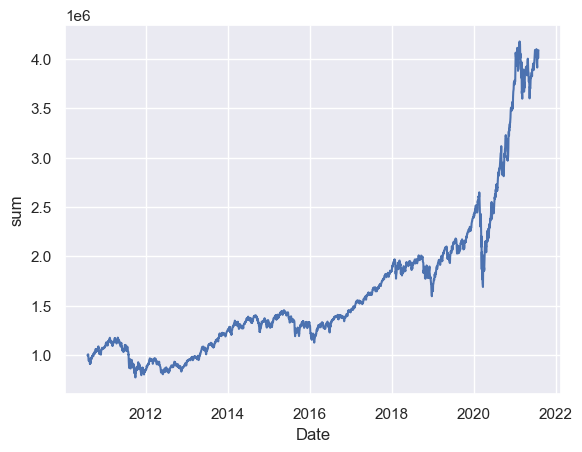

In [283]:
sns.set_theme()
sns.lineplot(data=high_portfolio_values,x='Date',y='sum')
plt.show()

In [284]:
np.corrcoef(high_portfolio_values['sum'],low_portfolio_values['sum'])

array([[1.        , 0.89189583],
       [0.89189583, 1.        ]])

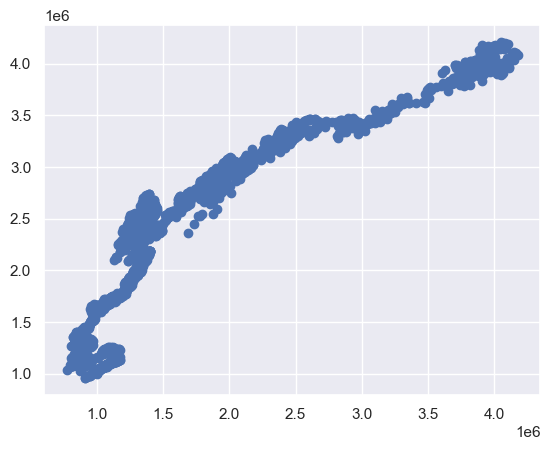

In [285]:
plt.scatter(high_portfolio_values['sum'],low_portfolio_values['sum'])
plt.show()

In [286]:
spy=pdr.get_data_yahoo('SPY','2010-08-01','2021-07-31')
port_spy_ret=spy.pct_change()
port_spy_cumret=np.cumprod(1+port_spy_ret)
values=port_spy_cumret*fv


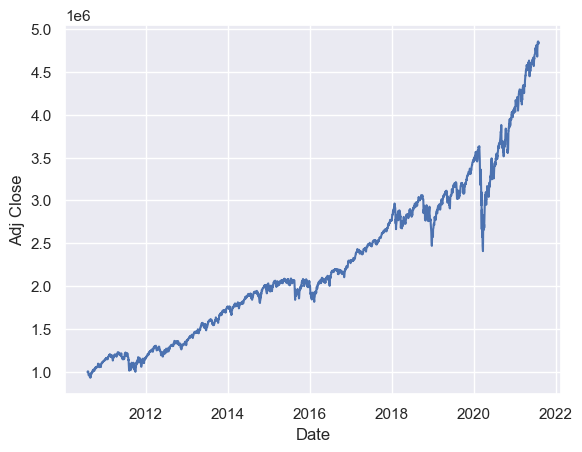

In [287]:
sns.lineplot(data=values,y='Adj Close',x='Date')
plt.show()

In [288]:
values

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-08-02,NaN,NaN,NaN,NaN,NaN,NaN
2010-08-03,9.984947e+05,1.002779e+06,1.004375e+06,9.952111e+05,7.790014e+05,9.952109e+05
2010-08-04,1.001505e+06,1.005559e+06,1.004822e+06,1.001862e+06,8.401626e+05,1.001862e+06
2010-08-05,9.997344e+05,1.004841e+06,1.002322e+06,1.000798e+06,7.461564e+05,1.000798e+06
2010-08-06,9.967239e+05,9.944414e+05,9.977677e+05,9.967187e+05,1.273368e+06,9.967186e+05
...,...,...,...,...,...,...
2021-07-26,3.904994e+06,3.938139e+06,3.922761e+06,3.911139e+06,2.322238e+05,4.854920e+06
2021-07-27,3.895343e+06,3.908822e+06,3.928119e+06,3.893313e+06,3.579940e+05,4.832793e+06
2021-07-28,3.898530e+06,3.920656e+06,3.926065e+06,3.891717e+06,2.787183e+05,4.830811e+06


In [289]:
compare=pd.DataFrame()
compare['High']=high_portfolio_values['sum']
compare['Low']=low_portfolio_values['sum']
compare['Index']=values['Adj Close']

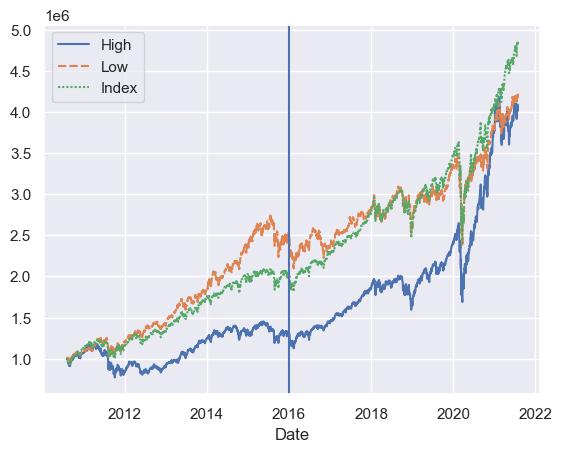

In [290]:
sns.lineplot(data=compare)
plt.axvline(dt.datetime(2016,1,1))
plt.show()

In [ ]:
#########Post 2016 Comparison

In [390]:
highport=['ERTH','TAN','XLF','XLK','ICLN','PBD','SUSA','QCLN','VGT','EWC']
lowport=['XPH','XBI','RHS','IYR','VNQ','PPH','IYH','IXJ','PSR','VHT']
low_portfolio_values=pd.DataFrame()

In [391]:
wt=[0.1]*10
fv=1000000
amt=[i*fv for i in wt]
amt_ref=dict(zip(lowport,amt))

In [392]:
adj_low=pd.DataFrame()
for i in lowport:
    p=pdr.get_data_yahoo(i,'2016-08-01','2021-07-31')
    price=p['Adj Close']
    rets=price.pct_change()
    cumrets=np.cumprod(1+rets)
    cumrets=cumrets*amt_ref[i]
    low_portfolio_values[i]=cumrets
    ret=p.pct_change()
    cumret=np.cumprod(1+ret)
    t=cumret.iloc[-1]['Adj Close']
    pv=pv+t*amt_ref[i]

In [393]:
low_portfolio_values['sum']=low_portfolio_values.sum(axis=1)

In [394]:
low_portfolio_values=low_portfolio_values.dropna()

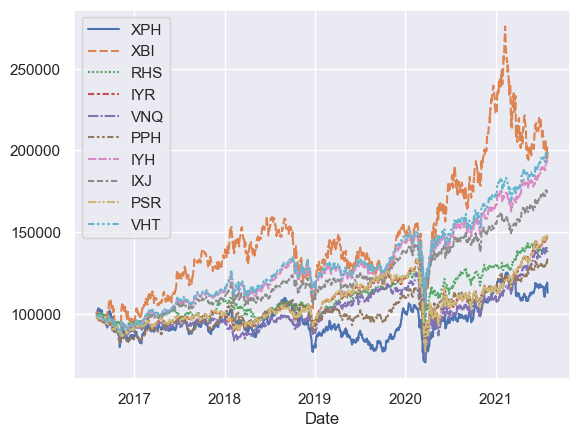

In [250]:
sns.set_theme()
sns.lineplot(data=low_portfolio_values.drop(['sum'],axis=1))
plt.legend()
plt.show()

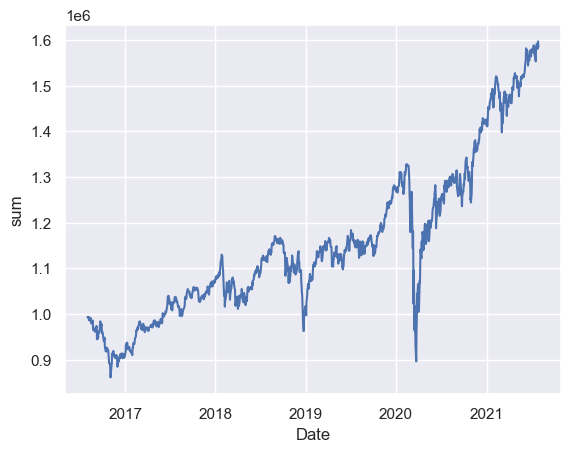

In [403]:
sns.set_theme()
sns.lineplot(data=low_portfolio_values,x='Date',y='sum')
plt.show()

In [395]:
wt=[0.1]*10
fv=1000000
amt=[i*fv for i in wt]
amt_ref=dict(zip(highport,amt))

In [405]:
high_portfolio_values=pd.DataFrame()

In [406]:
for i in highport:
    p=pdr.get_data_yahoo(i,'2016-08-01','2021-07-31')
    price=p['Adj Close']
    rets=price.pct_change()
    cumrets=np.cumprod(1+rets)
    cumrets=cumrets*amt_ref[i]
    high_portfolio_values[i]=cumrets
    ret=p.pct_change()
    cumret=np.cumprod(1+ret)
    t=cumret.iloc[-1]['Adj Close']
    pv=pv+t*amt_ref[i]

In [407]:
high_portfolio_values['sum']=high_portfolio_values.sum(axis=1)

In [408]:
high_portfolio_values=high_portfolio_values.dropna()

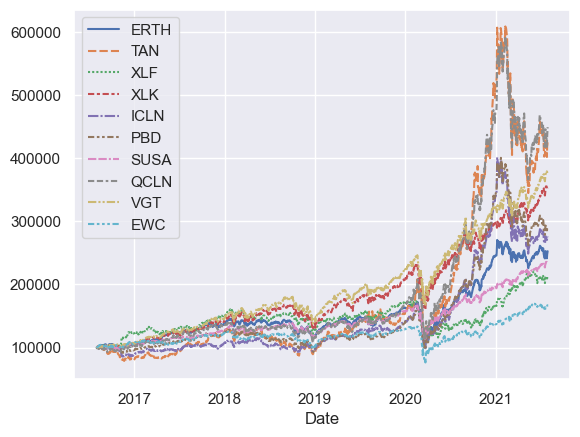

In [409]:
sns.set_theme()
sns.lineplot(data=high_portfolio_values.drop(['sum'],axis=1))
plt.legend()
plt.show()

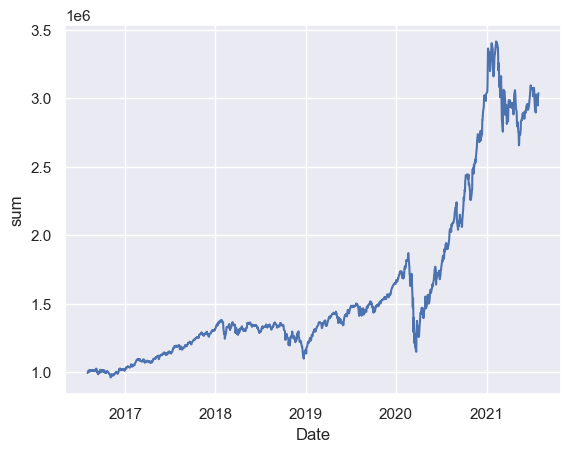

In [410]:
sns.set_theme()
sns.lineplot(data=high_portfolio_values,x='Date',y='sum')
plt.show()

In [399]:
fv=1000000

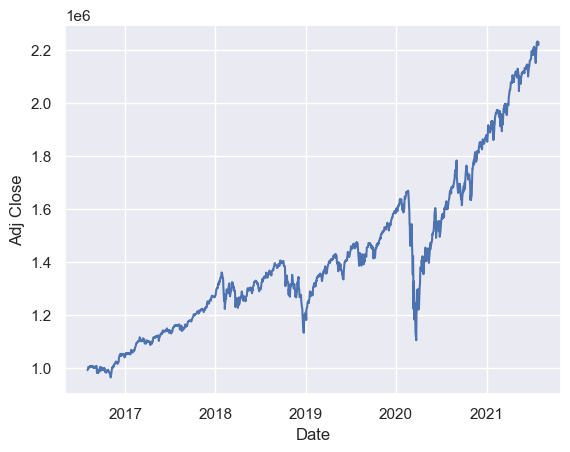

In [400]:
spy=pdr.get_data_yahoo('SPY','2016-08-01','2021-07-31')
port_spy_ret=spy.pct_change()
port_spy_cumret=np.cumprod(1+port_spy_ret)
values=port_spy_cumret*fv
sns.lineplot(data=values,y='Adj Close',x='Date')
plt.show()

In [411]:
compare=pd.DataFrame()
compare['High']=high_portfolio_values['sum']
compare['Low']=low_portfolio_values['sum']
compare['Index']=values['Adj Close']

In [413]:
compare.iloc[-1]

High     3.036819e+06
Low      1.585380e+06
Index    2.217868e+06
Name: 2021-07-30 00:00:00, dtype: float64

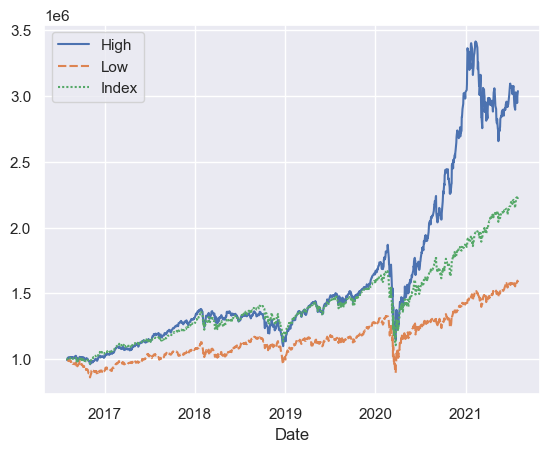

In [412]:
sns.lineplot(data=compare)
plt.show()

In [ ]:
###fresh releases in ESG post 2016

In [293]:
new_port=['SDG','ERTH','TAN','RNRG','ICLN','FAN','SMOG','ESGD','ESGE','NUSC','KRMA','FLOT','FTEC']


In [294]:
new_port_2016=list(set(new_port)-set(['NUSC','ESGD']))

In [316]:
wt=[1/(len(new_port_2016))]*len(new_port_2016)
fv=1000000
amt=[i*fv for i in wt]
amt_ref=dict(zip(new_port_2016,amt))

In [317]:
new_portfolio_values=pd.DataFrame()
for i in new_port_2016:
    p=pdr.get_data_yahoo(i,'2016-08-01','2017-07-31')
    price=p['Adj Close']
    rets=price.pct_change()
    cumrets=np.cumprod(1+rets)
    cumrets=cumrets*amt_ref[i]
    new_portfolio_values[i]=cumrets
    ret=p.pct_change()
    cumret=np.cumprod(1+ret)
    t=cumret.iloc[-1]['Adj Close']
    pv=pv+t*amt_ref[i]

In [308]:
new_portfolio_values

,ESGE,KRMA,TAN,ERTH,FAN,ICLN,FLOT,SDG,SMOG,FTEC,RNRG
Date,,,,,,,,,,,
2016-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-08-02,90496.612105,89811.108646,90615.166697,90304.384053,90559.170685,90610.376216,90891.147490,90909.090909,90489.360311,90027.782306,90909.090909
2016-08-03,90496.612105,90289.267116,92000.847723,90333.170585,90139.271118,91108.212978,90909.090909,90103.118877,90629.275164,90416.591221,91221.231490
2016-08-04,90496.612105,90572.609924,91370.999003,90937.890523,91608.931358,91904.785492,90909.090909,90780.874588,91083.996690,90960.957286,91658.206527
2016-08-05,90496.612105,91322.314879,92252.780290,91744.175052,91538.959854,91606.081329,90927.079318,90854.153208,92115.848660,91997.854525,91287.350743
...,...,...,...,...,...,...,...,...,...,...,...
2017-07-25,112885.006703,106072.339551,93963.684615,116407.790103,100400.407561,92729.989043,92617.007456,103705.554520,110321.971333,118350.003987,101825.681685
2017-07-26,113581.657106,105893.558375,93875.540225,116349.301312,100928.043020,93967.768044,92598.816594,103417.087128,110304.116397,118507.313805,102233.639380
2017-07-27,112981.671315,105393.017294,93478.877493,115003.889060,99269.764626,91801.644262,92617.007456,104147.630972,107624.221721,117484.805235,101825.681685


In [331]:
new_portfolio_values['sum']=new_portfolio_values.sum(axis=1)

In [318]:
wt=[1/(len(new_port))]*len(new_port)
fv=new_portfolio_values.sum(axis=1).iloc[-1]
amt=[i*fv for i in wt]
amt_ref=dict(zip(new_port,amt))

In [319]:
portfolio_values_2017=pd.DataFrame()
for i in new_port:
    p=pdr.get_data_yahoo(i,'2017-08-01','2021-07-31')
    price=p['Adj Close']
    rets=price.pct_change()
    cumrets=np.cumprod(1+rets)
    cumrets=cumrets*amt_ref[i]
    portfolio_values_2017[i]=cumrets
    ret=p.pct_change()
    cumret=np.cumprod(1+ret)
    t=cumret.iloc[-1]['Adj Close']
    pv=pv+t*amt_ref[i]

In [320]:
portfolio_values_2017['sum']=portfolio_values_2017.sum(axis=1)
portfolio_values_2017=portfolio_values_2017.dropna()

In [321]:
portfolio_values_2017

,SDG,ERTH,TAN,RNRG,ICLN,FAN,SMOG,ESGD,ESGE,NUSC,KRMA,FLOT,FTEC,sum
Date,,,,,,,,,,,,,,
2017-08-02,88011.610123,87667.781871,86822.780779,88090.348770,87909.498739,88805.411231,88158.147410,88202.206090,88292.734501,87717.661875,87904.558345,88219.549573,88419.186454,1.144221e+06
2017-08-03,88440.469079,87467.374034,87634.209306,88020.436974,88299.788487,89274.583951,87673.519148,88283.739240,87762.490427,87350.093956,87904.558345,88167.504844,88162.729989,1.144441e+06
2017-08-04,88116.438233,87756.840955,88567.353706,88020.436974,88787.640712,89408.637282,88011.288970,88310.930433,88098.745828,87817.918939,88003.770885,88219.549573,88281.095119,1.147401e+06
2017-08-07,88424.575701,87779.110706,90393.059929,88712.627515,89665.732883,89542.669704,88730.887295,88310.930433,88680.717305,88055.174548,88152.599820,88236.914476,88577.011892,1.153262e+06
2017-08-08,88456.355901,87400.574742,89175.917138,87342.373405,89275.463056,89408.637282,88701.522492,88025.521091,88810.046725,87884.744830,87706.123140,88254.243679,88734.829433,1.149176e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-26,165417.825715,171357.166399,343495.919658,131391.960040,232408.680213,151258.031262,231231.241882,118713.017478,118134.311381,156342.718377,169921.257360,94763.133535,252307.250149,2.336743e+06
2021-07-27,163548.898145,167081.045596,336189.272230,131067.327349,230747.139940,150824.424423,227054.256442,118145.791173,115723.967191,155273.343716,168656.317717,94763.133535,249445.039321,2.308520e+06
2021-07-28,165366.867242,171304.997815,350176.308505,134313.576509,237081.798336,154510.103460,233896.129308,118683.157991,118891.026536,156770.462408,169868.532982,94763.133535,249815.699303,2.355442e+06


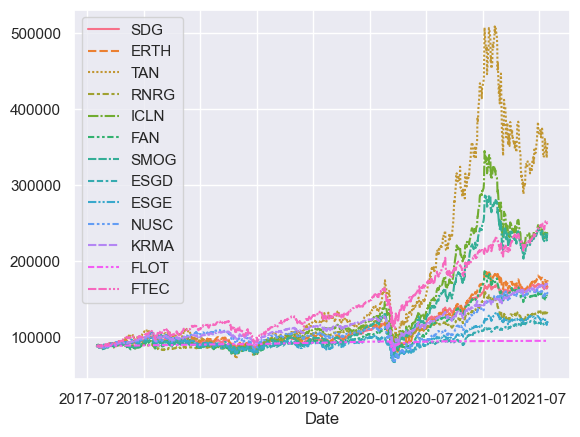

In [322]:
sns.set_theme()
sns.lineplot(data=portfolio_values_2017.drop(['sum'],axis=1))
plt.legend()
plt.show()

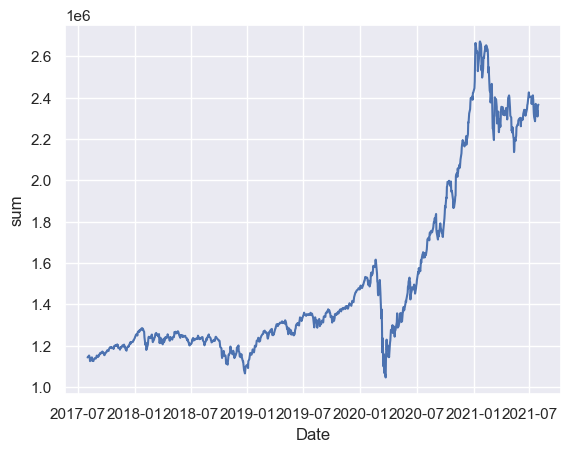

In [323]:
sns.set_theme()
sns.lineplot(data=portfolio_values_2017,x='Date',y='sum')
plt.show()

In [ ]:
fv=1000000
s=0
portfolio_value=list()
returns=1
for j in years: 
    annual_rate=0
    c=0
    portfolio=port_price.loc[j+'-08-01':str(int(j)+1)+'-07-31']
    antip=list()
    for i in ticker:
        port=portfolio[i]
        if(port.isnull().sum()>0):
            c+=1
            antip.append(i)
    wt=[1/(len(ticker)-c)]*(len(ticker)-c)
    amt=[fv*i for i in wt]
    p=list(set(ticker)-set(antip))
    ref=dict(zip(p,wt))
    x=dict(zip(p,amt))
    port=portfolio[p]
    ret=port.pct_change()
    ret=ret.dropna()
    cumret=np.cumprod(1+ret)
    cumret=cumret.dropna()
    yr_ret=cumret.iloc[-1]
    for k in p:
        annual_rate=annual_rate+(yr_ret[k]-1)*ref[k]
    returns=returns*(1+annual_rate)
    for j in range(len(cumret)):
        for k in p: 
            s=s+cumret.iloc[i][k]*x[k]
        portfolio_value.append(s)
        returns2.append(s)
    print(annual_rate)
print(returns)

In [324]:
new_portfolio_values['NUSC']=[0]*252
new_portfolio_values['ESGD']=[0]*252

In [332]:
df=new_portfolio_values.append(portfolio_values_2017)

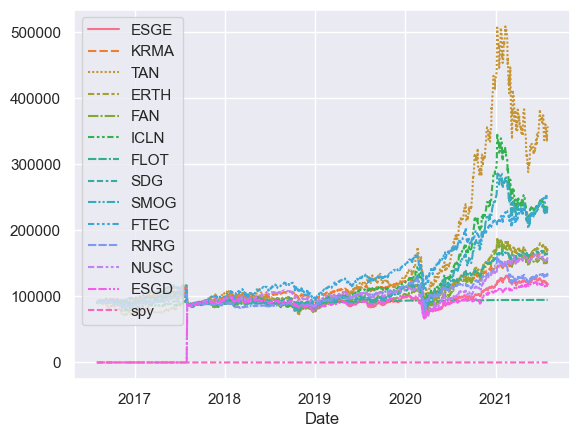

In [348]:
sns.lineplot(data=df.drop('sum',axis=1))
plt.legend()
plt.show()

Date
2016-08-02    9.956232e+05
2016-08-03    9.976467e+05
2016-08-04    1.002285e+06
2016-08-05    1.006143e+06
2016-08-08    1.011718e+06
                  ...     
2021-07-26    2.336743e+06
2021-07-27    2.308520e+06
2021-07-28    2.355442e+06
2021-07-29    2.364546e+06
2021-07-30    2.365629e+06
Name: sum, Length: 1257, dtype: float64

In [415]:
compare['new ESG']=df['sum']

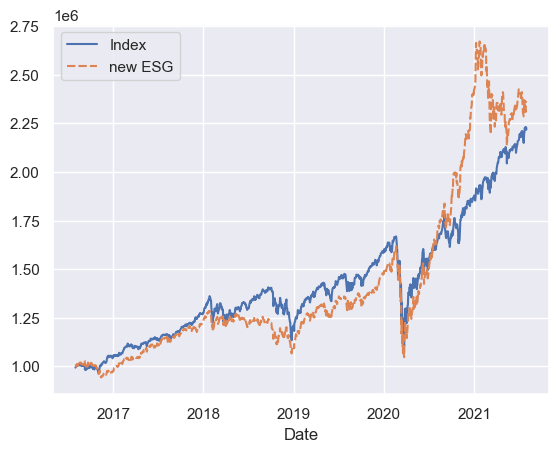

In [416]:
sns.lineplot(data=compare.drop(['High','Low'],axis=1))
plt.show()

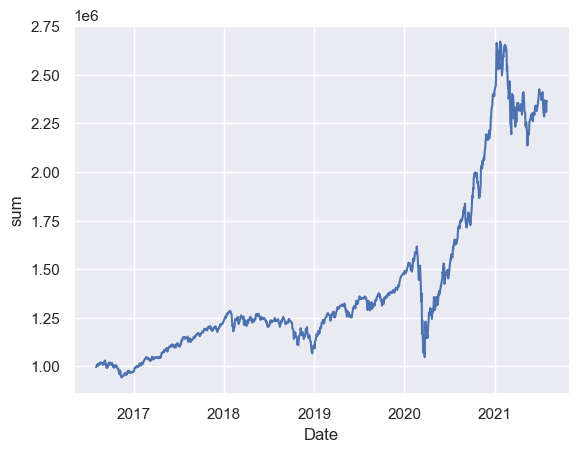

In [335]:
sns.lineplot(data=df.dropna(),x='Date',y='sum')
plt.show()

In [355]:
fv=1000000

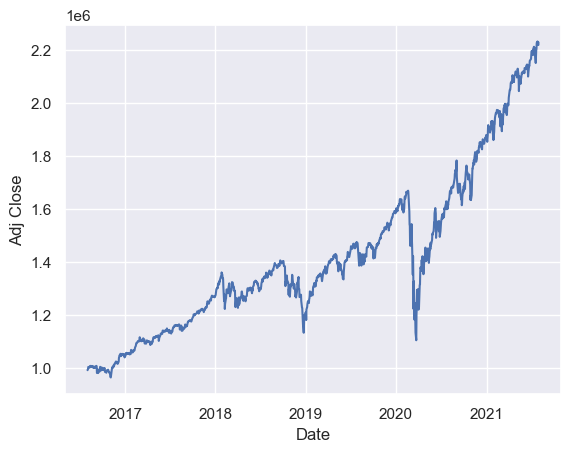

In [356]:
spy=pdr.get_data_yahoo('SPY','2016-08-01','2021-07-31')
port_spy_ret=spy.pct_change()
port_spy_cumret=np.cumprod(1+port_spy_ret)
values=port_spy_cumret*fv
sns.lineplot(data=values,y='Adj Close',x='Date')
plt.show()

In [357]:
df['spy']=values['Adj Close']

In [358]:
df.drop(new_port,axis=1)

,sum,spy
Date,,
2016-08-01,0.000000e+00,NaN
2016-08-02,9.956232e+05,9.935925e+05
2016-08-03,9.976467e+05,9.964967e+05
2016-08-04,1.002285e+06,9.975570e+05
2016-08-05,1.006143e+06,1.005716e+06
...,...,...
2021-07-26,2.336743e+06,2.230562e+06
2021-07-27,2.308520e+06,2.220396e+06
2021-07-28,2.355442e+06,2.219485e+06


In [361]:
df=df.dropna()

In [363]:
dfplt=df.drop(new_port,axis=1)

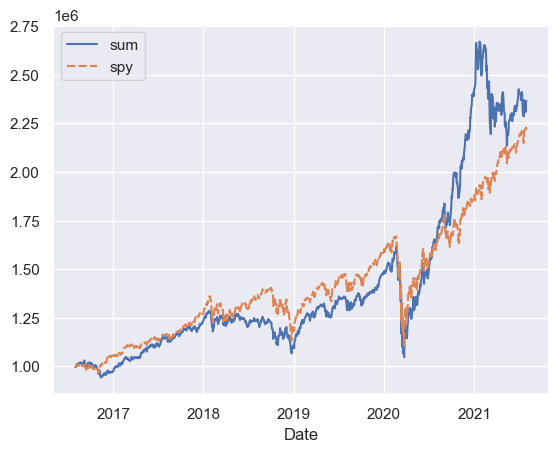

In [364]:
sns.lineplot(data=dfplt)
plt.show()

In [ ]:
##equal weighted all stocks high ESG

In [370]:
all_ESG=['SDG','RNRG','ICLN','FAN','SMOG','ESGD','ESGE','NUSC','KRMA','FLOT','FTEC','ERTH','TAN','XLF','XLK','PBD','SUSA','QCLN','VGT','EWC']
all_ESG_2016=list(set(new_port)-set(['NUSC','ESGD']))

In [371]:
wt=[1/(len(all_ESG_2016))]*len(all_ESG_2016)
fv=1000000
amt=[i*fv for i in wt]
amt_ref=dict(zip(all_ESG_2016,amt))

In [372]:
all_ESGdf=pd.DataFrame()
for i in all_ESG_2016:
    p=pdr.get_data_yahoo(i,'2016-08-01','2017-07-31')
    price=p['Adj Close']
    rets=price.pct_change()
    cumrets=np.cumprod(1+rets)
    cumrets=cumrets*amt_ref[i]
    all_ESGdf[i]=cumrets
    ret=p.pct_change()
    cumret=np.cumprod(1+ret)
    t=cumret.iloc[-1]['Adj Close']
    pv=pv+t*amt_ref[i]

In [373]:
all_ESGdf['sum']=all_ESGdf.sum(axis=1)

In [376]:
wt=[1/(len(all_ESG))]*len(all_ESG)
fv=all_ESGdf.sum(axis=1).iloc[-1]
amt=[i*fv for i in wt]
amt_ref=dict(zip(all_ESG,amt))

In [377]:
all_ESG_2017=pd.DataFrame()
for i in all_ESG:
    p=pdr.get_data_yahoo(i,'2017-08-01','2021-07-31')
    price=p['Adj Close']
    rets=price.pct_change()
    cumrets=np.cumprod(1+rets)
    cumrets=cumrets*amt_ref[i]
    all_ESG_2017[i]=cumrets
    ret=p.pct_change()
    cumret=np.cumprod(1+ret)
    t=cumret.iloc[-1]['Adj Close']
    pv=pv+t*amt_ref[i]

In [380]:
all_ESG_2017['sum']=all_ESG_2017.sum(axis=1)

In [378]:
all_ESGdf['NUSC']=[0]*252
all_ESGdf['ESGD']=[0]*252

In [381]:
allESG=all_ESGdf.append(all_ESG_2017)

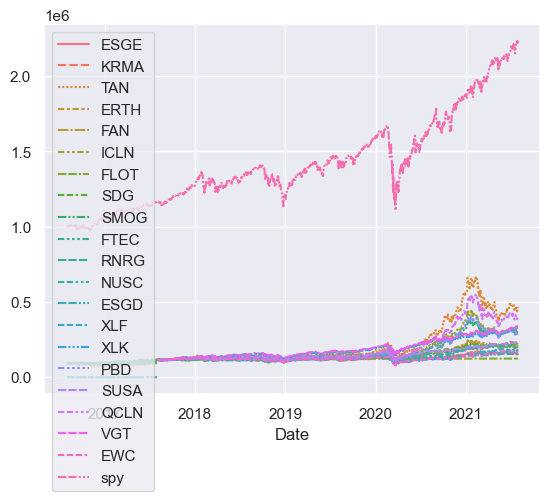

In [385]:
sns.lineplot(data=allESG.drop('sum',axis=1))

plt.show()

In [383]:
allESG['spy']=values['Adj Close']

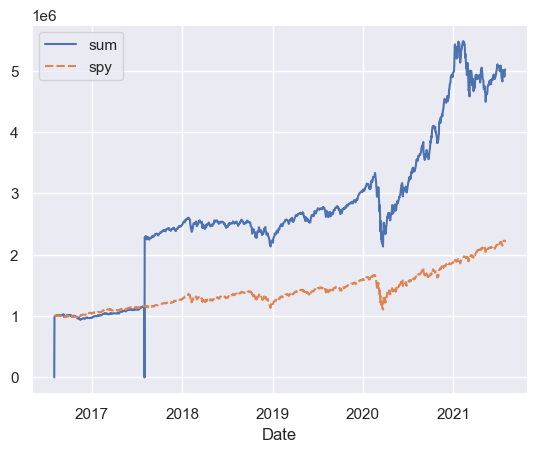

In [384]:
sns.lineplot(data=allESG.drop(all_ESG,axis=1))
plt.legend()
plt.show()